In [29]:
import numpy as np 
import pandas as pd 
import seaborn as sns

In [30]:
df=sns.load_dataset("iris")

In [31]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [32]:
df["species"].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [33]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [34]:
df=df[df["species"]!='setosa']

In [35]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
50,7.0,3.2,4.7,1.4,versicolor
51,6.4,3.2,4.5,1.5,versicolor
52,6.9,3.1,4.9,1.5,versicolor
53,5.5,2.3,4.0,1.3,versicolor
54,6.5,2.8,4.6,1.5,versicolor


In [36]:
df["species"]=df["species"].map({"versicolor":0,"virginica":1})

In [37]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
50,7.0,3.2,4.7,1.4,0
51,6.4,3.2,4.5,1.5,0
52,6.9,3.1,4.9,1.5,0
53,5.5,2.3,4.0,1.3,0
54,6.5,2.8,4.6,1.5,0


In [38]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [39]:
X

,sepal_length,sepal_width,petal_length,petal_width
50,7.0,3.2,4.7,1.4
51,6.4,3.2,4.5,1.5
52,6.9,3.1,4.9,1.5
53,5.5,2.3,4.0,1.3
54,6.5,2.8,4.6,1.5
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [40]:
y

50     0
51     0
52     0
53     0
54     0
      ..
145    1
146    1
147    1
148    1
149    1
Name: species, Length: 100, dtype: int64

In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42)

In [46]:
from sklearn.linear_model import LogisticRegression
regression=LogisticRegression()

In [54]:
from sklearn.model_selection import GridSearchCV
parameter={"penalty":["l1","l2","elasticnet"],"C":[1,2,3,4,5,10,20,30,40,50],"max_iter":[100,200,300]}

In [55]:
logistic_regression=GridSearchCV(regression,param_grid=parameter,scoring="accuracy",cv=5)

In [58]:
logistic_regression.fit(X_train,y_train)

C:\Users\abhij\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:516: FitFailedWarning: 
300 fits failed out of a total of 450.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
150 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\abhij\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\abhij\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", line 1363, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\abhij\App

,estimator,LogisticRegression()
,param_grid,"{'C': [1, 2, ...], 'max_iter': [100, 200, ...], 'penalty': ['l1', 'l2', ...]}"
,scoring,'accuracy'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,penalty,'l2'


In [59]:
print(logistic_regression.best_params_)

{'C': 1, 'max_iter': 100, 'penalty': 'l2'}


In [60]:
print(logistic_regression.best_score_)

0.9733333333333334


In [67]:
y_prep=logistic_regression.predict(X_test)

In [68]:
from sklearn.metrics import accuracy_score,classification_report

In [69]:
score=accuracy_score(y_prep,y_test)

In [70]:
print(score)

0.92


In [72]:
print(classification_report(y_prep,y_test))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93        14
           1       0.91      0.91      0.91        11

    accuracy                           0.92        25
   macro avg       0.92      0.92      0.92        25
weighted avg       0.92      0.92      0.92        25



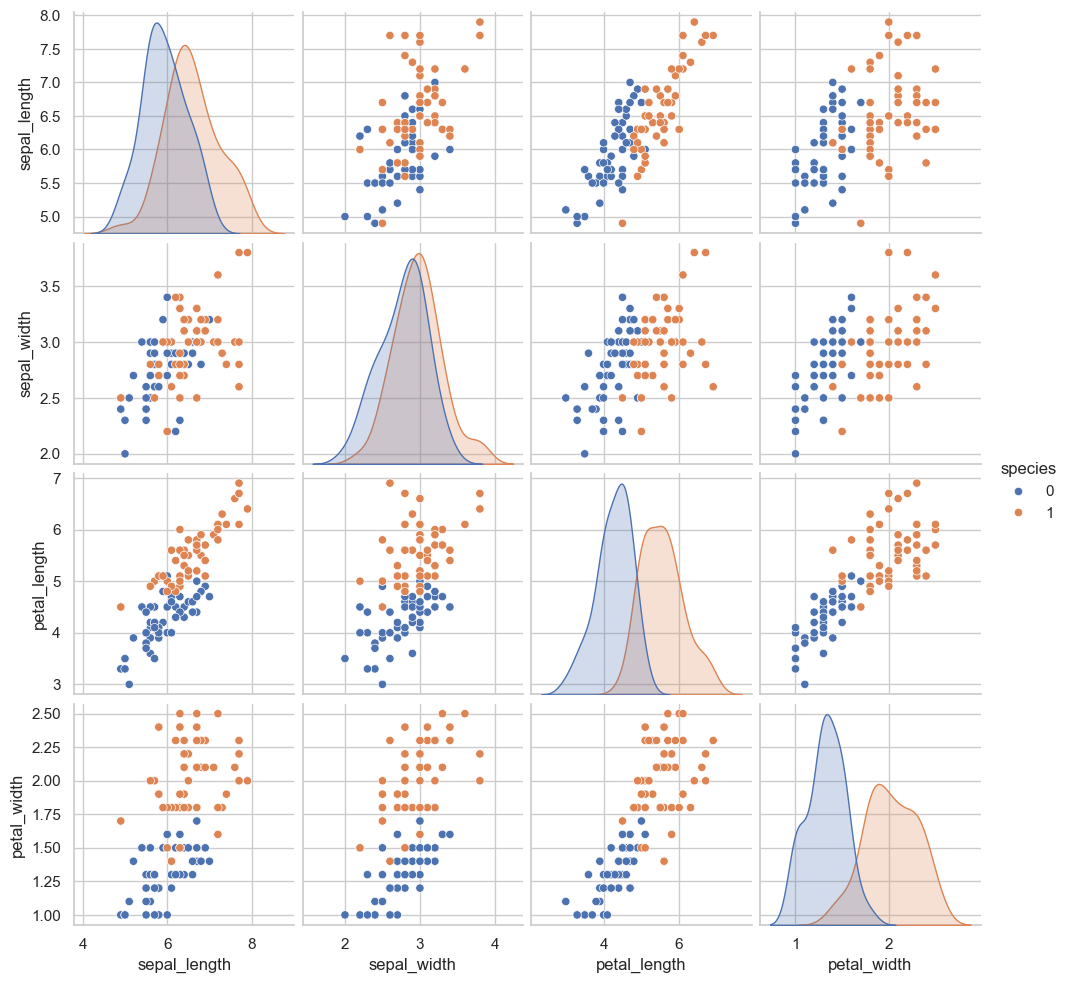

In [73]:
sns.pairplot(df,hue="species")